# Data Exploration
Look at raw data, display image, determine train/test data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
plt.style.use('dark_background')

In [3]:
path = os.getcwd()
path = path[:-4]
data_dir = path + "/data/lfw-deepfunneled"

In [4]:
people = pd.read_csv(path + "/data/people.csv")

In [5]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


5758 people in metadata spreadsheet... let's consider only the intersection.

In [6]:
names = [item for item in people["name"].tolist() if item in os.listdir(data_dir)]

In [7]:
len(names)

5749

In [8]:
people = people[people["name"].isin(names)]

In [9]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


In [10]:
people["images"].sum()

13233.0

In [11]:
N = 6

In [12]:
people = people[people.images > N]

In [13]:
len(people)

256

Train on every person who has over at least 6 images. If $n_{person} = a$ then train on $a-1$ images. Use $a^{th}$ image as test. There will be $k=256$ classes.

Let's get the pixel matrix of an image and plot it.

In [14]:
sample_name = people.iloc[1]["name"]
sample_name

'Bill_Frist'

In [15]:
image_path = data_dir + '/' + sample_name + '/' + sample_name + '_0001.jpg'

In [16]:
image = cv2.imread(image_path)

In [17]:
image.shape

(250, 250, 3)

250 x 250 pixels with 3 color channels

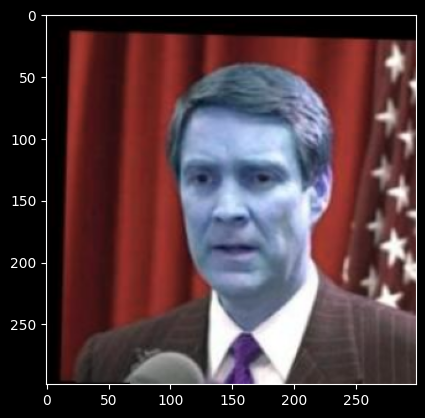

In [18]:
test_image = cv2.resize(image, (299, 299))
plt.imshow(test_image)
plt.axis()
plt.show()